<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/%E5%88%86%E6%9E%90%E8%99%9B%E6%93%AC%E8%B2%A8%E5%B9%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 設定

In [1]:
!pip install finlab_crypto > log.txt

In [2]:
import finlab_crypto
finlab_crypto.setup()

# 載入歷史價格資料

In [11]:
ohlcv = finlab_crypto.crawler.get_all_binance('BNBUSDT', '4h')
ohlcv.head()

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-11-06 00:00:00+00:00,1.5000,1.7990,0.5000,1.7000,649.12,1.509941e+12,725.121420,33.0,207.45,351.414420,1.020813e+08
2017-11-06 04:00:00+00:00,1.3000,1.6810,1.3000,1.6250,52482.55,1.509955e+12,83759.739135,357.0,22743.92,37202.075595,1.021827e+08
2017-11-06 08:00:00+00:00,1.6011,1.6760,1.5800,1.6288,21742.42,1.509970e+12,35135.216283,147.0,6061.37,9898.109869,1.022866e+08
2017-11-06 12:00:00+00:00,1.6288,1.6288,1.5645,1.6148,22186.53,1.509984e+12,35352.202964,167.0,10238.95,16420.835876,1.022850e+08
2017-11-06 16:00:00+00:00,1.6148,1.6310,1.5645,1.5868,11769.81,1.509998e+12,18659.767745,132.0,3149.95,4991.658829,1.022830e+08


In [12]:
ohlcv.tail()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2020-12-31 20:00:00+00:00,37.1400,37.4231,36.9195,37.3588,124091.007,1.609459e+12,4.611571e+06,21678.0,64636.106,2.402245e+06,0.0
2021-01-01 00:00:00+00:00,37.3596,38.1000,36.9636,37.9250,471487.943,1.609474e+12,1.775203e+07,43044.0,232480.989,8.755133e+06,0.0
2021-01-01 04:00:00+00:00,37.9240,38.0765,37.3781,37.6812,307025.593,1.609488e+12,1.157532e+07,25423.0,159245.611,6.002422e+06,0.0
2021-01-01 08:00:00+00:00,37.6850,38.9590,37.3425,38.3904,473363.617,1.609502e+12,1.812502e+07,48449.0,245259.458,9.386376e+06,0.0
2021-01-01 12:00:00+00:00,38.3941,38.8814,38.2772,38.4040,136529.447,1.609517e+12,5.263229e+06,18687.0,65923.496,2.542337e+06,0.0


# 定義策略

In [13]:
@finlab_crypto.Strategy(n1=20, n2=60)
def sma_strategy(ohlcv):
  n1 = sma_strategy.n1
  n2 = sma_strategy.n2

  sma1 = ohlcv.close.rolling(int(n1)).mean()
  sma2 = ohlcv.close.rolling(int(n2)).mean()
  return (sma1 > sma2), (sma1 < sma2)

# 回測

In [14]:
vars =  {'n1': 20, 'n2': 60}
portfolio = sma_strategy.backtest(ohlcv, vars,freq='4h', plot=True)

# 優化

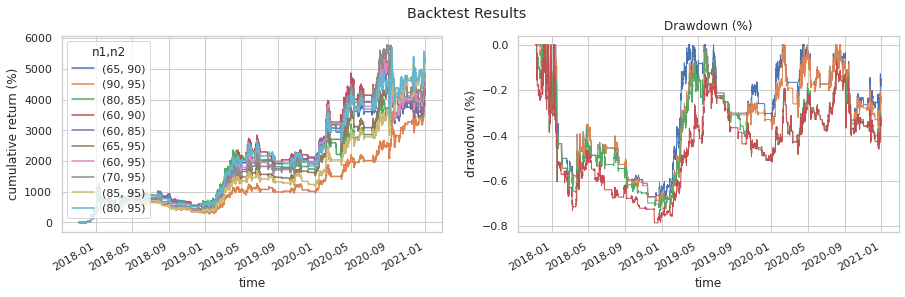

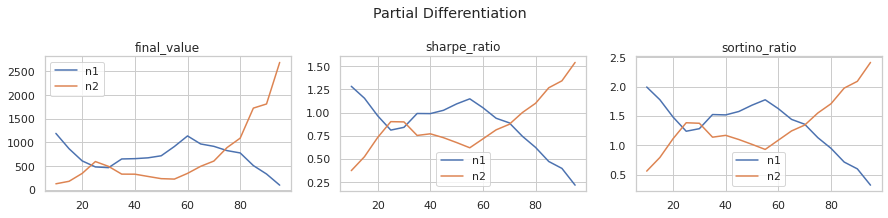

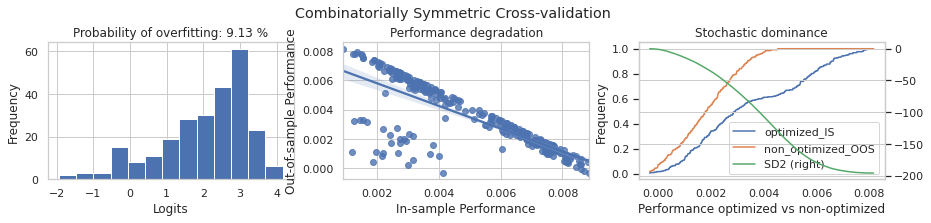

Output()

In [15]:
import numpy as np

vars = {
  'n1': np.arange(10, 100, 5), 
  'n2': np.arange(10, 100, 5)
}

portfolio = sma_strategy.backtest(ohlcv, vars ,freq='4h', plot=True)

In [18]:
vars =  {'n1': 80, 'n2': 95}
portfolio = sma_strategy.backtest(ohlcv, vars,freq='4h', plot=True)

# 產生交易訊號(現在)

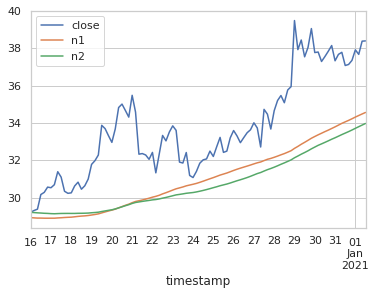

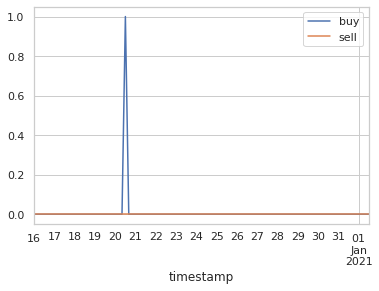

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

V1 = 80
V2 = 95
table = pd.DataFrame()
table['close'] = ohlcv.close
table['n1'] = ohlcv.close.rolling(V1).mean()
table['n2'] = ohlcv.close.rolling(V2).mean()
table.tail(100).plot()
table['buy'] = ((table['n1']>table['n2'])&(table['n1'].shift()<table['n2'].shift())).astype(int)
table['sell'] = ((table['n1']<table['n2'])&(table['n1'].shift()>table['n2'].shift())).astype(int)
table[['buy','sell']].tail(100).plot()